In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Load Datasets

In [3]:


# Read the CSV file into a DataFrame
mask_dataset = pd.read_csv('Mask_use_data_ON_2020.csv')
OxGRT_dataset = pd.read_csv("OxGRT_Index_ON_2020.csv")

mobility_dataset = pd.read_csv("Mobility_Data_ON_2020.csv")
hospitality_dataset = pd.read_csv("region_hospital_icu_covid_data.csv")


In [4]:
def convert_date(date_string): 
    '''
    change the date fomat yyyy-mm-dd to yyyymmdd
    '''
    return ''.join(filter(str.isdigit, date_string))




### OxGRT v.s. Mask

In [5]:
OxGRT_dataset['Date']

0      20200101
1      20200102
2      20200103
3      20200104
4      20200105
         ...   
361    20201227
362    20201228
363    20201229
364    20201230
365    20201231
Name: Date, Length: 366, dtype: int64

In [6]:
mask_dataset['date'] = mask_dataset['date'].apply(convert_date).astype(int)
OxGRT_dataset['Date'] = OxGRT_dataset['Date'].astype(int)

mask_dataset = mask_dataset.dropna(subset=['mask_use_mean'])
OxGRT_dataset = OxGRT_dataset.dropna(subset=['StringencyIndex'])

In [7]:
mask_dataset

,location_id,date,version_name,location_name,mask_use_mean,mask_use_obs
0,43866,20200204,reference,Ontario,0.0028,1.0
1,43866,20200205,reference,Ontario,0.0044,1.0
2,43866,20200206,reference,Ontario,0.0064,1.0
3,43866,20200207,reference,Ontario,0.0089,1.0
4,43866,20200208,reference,Ontario,0.0117,1.0
...,...,...,...,...,...,...
326,43866,20201226,reference,Ontario,0.8585,1.0
327,43866,20201227,reference,Ontario,0.8568,1.0
328,43866,20201228,reference,Ontario,0.8553,1.0
329,43866,20201229,reference,Ontario,0.8540,1.0


In [8]:
len(mask_dataset['date']), len(OxGRT_dataset['Date'])

(331, 366)

In [9]:
# convert to np array with int entries
mask_date = np.array(mask_dataset['date'])
OxGRT_date = np.array(OxGRT_dataset['Date'])
# finding the indexes with identical entries

identical_dates = np.intersect1d(mask_date, OxGRT_date)
indexes_in_mask_dataset = np.where(np.isin(mask_date, identical_dates))[0]
indexes_in_OxGRT_dataset = np.where(np.isin(OxGRT_date, identical_dates))[0]

In [10]:
# common dates between valid mask_date 
print(f'The starting date: {min(identical_dates)}. \n The end date: {max(identical_dates)}')

The starting date: 20200204. 
 The end date: 20201230


In [11]:
mask = np.array(mask_dataset['mask_use_mean'][indexes_in_mask_dataset])
OxGRT = np.array(OxGRT_dataset['StringencyIndex'][indexes_in_OxGRT_dataset])

In [12]:
assert np.array_equal(mask_date[indexes_in_mask_dataset], OxGRT_date[indexes_in_OxGRT_dataset])

Text(0, 0.5, 'mask_use_mean')

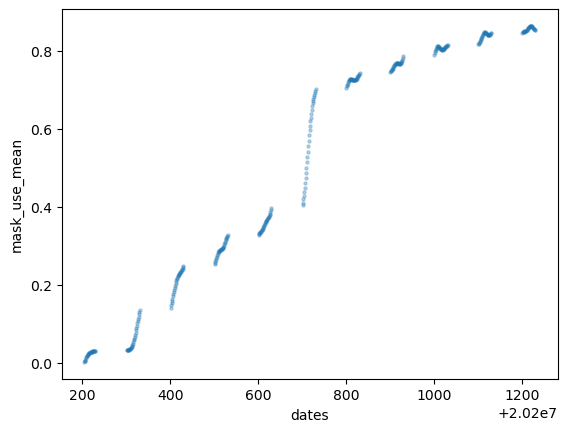

In [13]:


plt.scatter(mask_date[indexes_in_mask_dataset], mask,s=5, alpha=0.3)

plt.xlabel('dates')
plt.ylabel('mask_use_mean')

Text(0, 0.5, 'OxGRT')

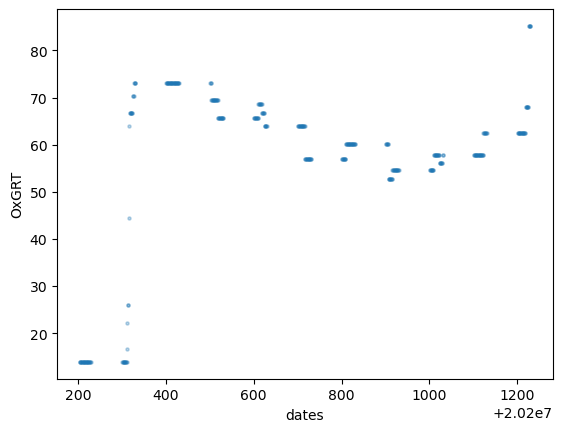

In [14]:
plt.scatter(OxGRT_date[indexes_in_OxGRT_dataset], OxGRT, s=5, alpha=0.3)

plt.xlabel('dates')
plt.ylabel('OxGRT')

In [15]:
r_mask_OxGRT = np.corrcoef(mask, OxGRT)[0,1]
r_mask_OxGRT

0.36212293193720274

In [37]:
# Linear regression to compute r_c
OxGRT = OxGRT.reshape(-1,1)
modelc = LinearRegression().fit(OxGRT, mask)


In [38]:
print(f"coefficient of determination: {modelc.score(OxGRT, mask)}")

coefficient of determination: 0.13113301783479658


In [39]:
modelc.coef_, modelc.intercept_

(array([0.00642185]), 0.13977373201910803)

In [ ]:
rc = modelc.intercept_

### Mobility v.s Hopitality

In [20]:
hospitality_dataset

,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,2020-04-02,CENTRAL,51,39,113,0,0,0,0
1,2020-04-03,CENTRAL,57,52,141,0,0,0,0
2,2020-04-04,CENTRAL,65,57,143,0,0,0,0
3,2020-04-05,CENTRAL,65,55,174,0,0,0,0
4,2020-04-06,CENTRAL,73,58,187,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2850,2021-10-21,WEST,52,35,108,63,43,11,8
2851,2021-10-22,WEST,48,27,102,59,35,11,8
2852,2021-10-23,WEST,38,28,104,49,35,11,7
2853,2021-10-24,WEST,38,27,70,49,32,11,5


In [21]:
# convert dates type to yyyymmdd as INT
mobility_dataset['date'] = mobility_dataset['date'].apply(convert_date).astype(int)
hospitality_dataset['date'] = hospitality_dataset['date'].apply(convert_date).astype(int)

In [22]:
hospitality_dataset[hospitality_dataset['oh_region'] == 'CENTRAL']

,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,20200402,CENTRAL,51,39,113,0,0,0,0
1,20200403,CENTRAL,57,52,141,0,0,0,0
2,20200404,CENTRAL,65,57,143,0,0,0,0
3,20200405,CENTRAL,65,55,174,0,0,0,0
4,20200406,CENTRAL,73,58,187,0,0,0,0
...,...,...,...,...,...,...,...,...,...
566,20211021,CENTRAL,35,21,87,46,30,11,9
567,20211022,CENTRAL,28,20,88,41,30,13,10
568,20211023,CENTRAL,26,20,89,39,31,13,11
569,20211024,CENTRAL,29,22,58,42,33,13,11


In [23]:
'''
Here the hospitality_dataset is on regions in ON, want to sum over regions to construct dataset over the whole ON. 
'''
regions = hospitality_dataset['oh_region'].unique()
centrals = hospitality_dataset[hospitality_dataset['oh_region'] == 'CENTRAL']
easts = hospitality_dataset[hospitality_dataset['oh_region'] == 'EAST']
norths = hospitality_dataset[hospitality_dataset['oh_region'] == 'NORTH']
torontos = hospitality_dataset[hospitality_dataset['oh_region'] == 'TORONTO']
wests = hospitality_dataset[hospitality_dataset['oh_region'] == 'WEST']
check_same_dates = np.array_equal(np.array(centrals['date']), np.array(easts['date'])) and np.array_equal(np.array(centrals['date']), np.array(norths['date'])) and np.array_equal(np.array(centrals['date']), np.array(norths['date'])) and np.array_equal(np.array(centrals['date']), np.array(torontos['date'])) and np.array_equal(np.array(centrals['date']), np.array(wests['date']))

In [24]:
regions

array(['CENTRAL', 'EAST', 'NORTH', 'TORONTO', 'WEST'], dtype=object)

In [25]:
assert check_same_dates == True, print('dates in regions are not the same')
centrals


,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,20200402,CENTRAL,51,39,113,0,0,0,0
1,20200403,CENTRAL,57,52,141,0,0,0,0
2,20200404,CENTRAL,65,57,143,0,0,0,0
3,20200405,CENTRAL,65,55,174,0,0,0,0
4,20200406,CENTRAL,73,58,187,0,0,0,0
...,...,...,...,...,...,...,...,...,...
566,20211021,CENTRAL,35,21,87,46,30,11,9
567,20211022,CENTRAL,28,20,88,41,30,13,10
568,20211023,CENTRAL,26,20,89,39,31,13,11
569,20211024,CENTRAL,29,22,58,42,33,13,11


In [26]:
col_names = centrals.columns.tolist()[2:]
col_names

['icu_current_covid',
 'icu_current_covid_vented',
 'hospitalizations',
 'icu_crci_total',
 'icu_crci_total_vented',
 'icu_former_covid',
 'icu_former_covid_vented']

In [27]:
# construct total_hospitality_dataset, summed over all regions
total_hospitality_dataset = pd.DataFrame(columns=[])

total_hospitality_dataset = centrals[['date']]
total_hospitality_dataset['oh_region'] = 'ALL'
#total_hospitality_dataset['icu_current_covid'] = np.array(centrals['icu_current_covid']) + np.array(easts['icu_current_covid'].tolist())
for name in col_names: 
    total_hospitality_dataset[name] = np.array(centrals[name]) + np.array(easts[name]) + np.array(norths[name]) + np.array(torontos[name]) + np.array(wests[name]) 

total_hospitality_dataset

/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_31692/3694095269.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_hospitality_dataset['oh_region'] = 'ALL'
/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/ipykernel_31692/3694095269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_hospitality_dataset[name] = np.array(centrals[name]) + np.array(easts[name]) + np.array(norths[name]) + np.array(torontos[name]) + np.array(wests[name])
/var/folders/7_/yd2c8wld3sggx9gtmv9ydwm80000gn/T/i

,date,oh_region,icu_current_covid,icu_current_covid_vented,hospitalizations,icu_crci_total,icu_crci_total_vented,icu_former_covid,icu_former_covid_vented
0,20200402,ALL,167,112,407,0,0,0,0
1,20200403,ALL,194,140,446,0,0,0,0
2,20200404,ALL,190,149,475,0,0,0,0
3,20200405,ALL,200,154,508,0,0,0,0
4,20200406,ALL,216,160,576,0,0,0,0
...,...,...,...,...,...,...,...,...,...
566,20211021,ALL,135,86,274,161,107,26,21
567,20211022,ALL,121,72,261,149,94,28,22
568,20211023,ALL,107,73,269,136,96,29,23
569,20211024,ALL,107,76,164,137,97,30,21


In [28]:
total_hospitality_dates = np.array(total_hospitality_dataset['date'])
mobility_dates = np.array(mobility_dataset['date'])

identical_dates = np.intersect1d(total_hospitality_dates, mobility_dates)
indexes_in_total_hospitality_dates = np.where(np.isin(total_hospitality_dates, identical_dates))[0]
indexes_in_mobility_dates = np.where(np.isin(mobility_dates, identical_dates))[0]

In [29]:
assert np.array_equal(total_hospitality_dates[indexes_in_total_hospitality_dates], mobility_dates[indexes_in_mobility_dates])

In [30]:

hospitalization = np.array(total_hospitality_dataset['hospitalizations'][indexes_in_total_hospitality_dates])
mobility = np.array(mobility_dataset['workplaces_percent_change_from_baseline'][indexes_in_mobility_dates])

Text(0, 0.5, 'hospitalizations')

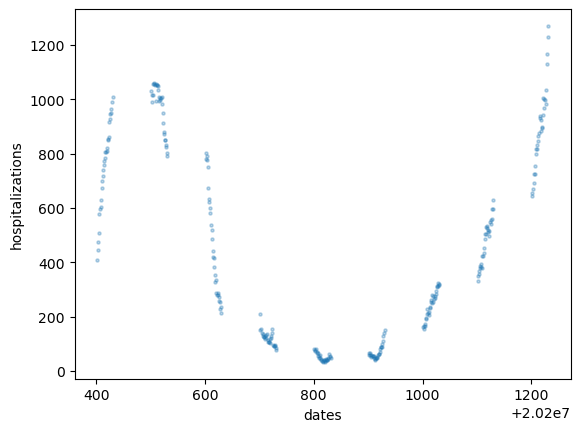

In [31]:
plt.scatter(total_hospitality_dates[indexes_in_total_hospitality_dates], hospitalization,s=5, alpha=0.3)

plt.xlabel('dates')
plt.ylabel('hospitalizations')

Text(0, 0.5, 'mobility')

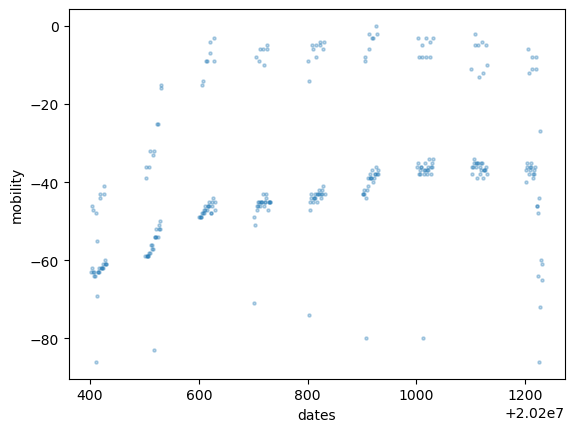

In [32]:
plt.scatter(mobility_dates[indexes_in_mobility_dates], mobility,s=5, alpha=0.3)

plt.xlabel('dates')
plt.ylabel('mobility')

In [33]:
r_hospitalization_mobility = np.corrcoef(mobility, hospitalization)[0,1]
r_hospitalization_mobility

-0.3494340419388468

In [44]:
# Linear regression to compute r_i
hospitalization = hospitalization.reshape(-1,1)
modeli = LinearRegression().fit(hospitalization, mobility)

In [45]:
modeli.score(hospitalization, mobility)

0.12210414966571959

In [46]:
modeli.coef_, modeli.intercept_

(array([-0.01854903]), -29.33900549575587)

In [47]:
ri = modeli.intercept_